In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("results_experiments2.csv")
df.head()

,puzzle_id,rating,moves,themes,fen,solution_depth,description,algo,heuristic,found,solution_length,nodes_expanded,runtime,reached_max_nodes
0,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],bfs,na,1,3,3053,2.063831,0
1,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],dfs,na,0,-1,10000,0.288203,1
2,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],ucs,na,1,3,3053,2.021667,0
3,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,null_heuristic,1,3,3053,2.028469,0
4,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,material_heuristic,1,3,372,0.289626,0


In [16]:
# Basic aggregate comparison
grouped = df.groupby(["algo", "heuristic"]).agg(
    solved_rate=("found", "mean"),
    mean_nodes=("nodes_expanded", "mean"),
    median_nodes=("nodes_expanded", "median"),
    mean_runtime=("runtime", "mean"),
)

grouped.sort_values("mean_nodes")

solved_rate  mean_nodes  median_nodes  \
algo  heuristic                                                               
astar composite_heuristic                     1.0      1163.1         177.5   
      mobility_heuristic                      0.8      2438.8         470.0   
      opponent_king_escape_heuristic          0.9      3185.9        1315.5   
      mate_in_one_heuristic                   0.6      4533.2        2534.0   
      null_heuristic                          0.6      4737.0        2918.0   
bfs   na                                      0.6      4737.0        2918.0   
ucs   na                                      0.6      4737.0        2918.0   
astar checks_available_heuristic              0.5      5321.9        5852.5   
      attacker_proximity_heuristic            0.6      5387.3        5341.5   
dfs   na                                      0.6      5800.9        6409.0   
astar material_heuristic                      0.5      6769.7        9111.5   

                                      mean_runtime  
algo  heuristic                                     
astar composite_heuristic                 4.140406  
      mobility_heuristic                  0.986502  
      opponent_king_escape_heuristic      6.530948  
      mate_in_one_heuristic              26.087834  
      null_heuristic                      5.025320  
bfs   na                                  4.964125  
ucs   na                                  5.080061  
astar checks_available_heuristic         22.727684  
      attacker_proximity_heuristic        6.036906  
dfs   na                                  0.155399  
astar material_heuristic                  8.086001

In [17]:
# Per puzzle view for a given FEN
fen_example = df["fen"].iloc[0]
df[df["fen"] == fen_example].sort_values(["algo", "heuristic"])

,puzzle_id,rating,moves,themes,fen,solution_depth,description,algo,heuristic,found,solution_length,nodes_expanded,runtime,reached_max_nodes
6,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,attacker_proximity_heuristic,1,3,6012,4.683170,0
9,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,checks_available_heuristic,0,-1,10000,24.496313,1
10,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,composite_heuristic,1,3,147,0.370511,0
5,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,mate_in_one_heuristic,1,3,1029,3.683147,0
4,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,material_heuristic,1,3,372,0.289626,0
8,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,mobility_heuristic,0,-1,10000,2.685918,1
3,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,null_heuristic,1,3,3053,2.028469,0
7,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],astar,opponent_king_escape_heuristic,1,3,28,0.041872,0
0,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],bfs,na,1,3,3053,2.063831,0
1,000Zo,1353,e5f6 e8e1 g1f2 e1f1,['endgame' 'mate' 'mateIn2' 'short'],4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,2,['endgame' 'mate' 'mateIn2' 'short'],dfs,na,0,-1,10000,0.288203,1


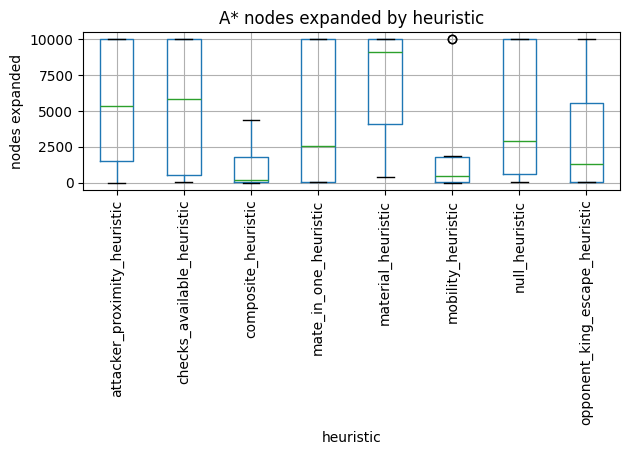

In [18]:

astar = df[df["algo"] == "astar"]

fig, ax = plt.subplots()
astar.boxplot(column="nodes_expanded", by="heuristic", ax=ax, rot=90)
ax.set_title("A* nodes expanded by heuristic")
ax.set_ylabel("nodes expanded")
plt.suptitle("")
plt.tight_layout()

In [19]:
def plot_nodes_expanded(algorithms=None, heuristics=None, title="Nodes Expanded"):
    """
    df: results.csv loaded as DataFrame
    algorithms: list of algorithm names to include (e.g. ["astar", "bfs"])
    heuristics: list of heuristic names to include (only affects A*)
    """

    data = df.copy()

    # Filter by algorithms
    if algorithms is not None:
        data = data[data["algo"].isin(algorithms)]

    # Filter by heuristics (only meaningful for A*)
    if heuristics is not None:
        data = data[
            (data["algo"] != "astar") | 
            (data["heuristic"].isin(heuristics))
        ]

    # Determine grouping column
    if "astar" in data["algo"].unique():
        group_col = "heuristic"
    else:
        group_col = "algo"

    # Plot
    fig, ax = plt.subplots(figsize=(12, 4))
    data.boxplot(
        column="nodes_expanded",
        by=group_col,
        ax=ax,
        rot=90,
    )
    ax.set_title(f"{title} ({group_col})")
    ax.set_ylabel("Nodes Expanded")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

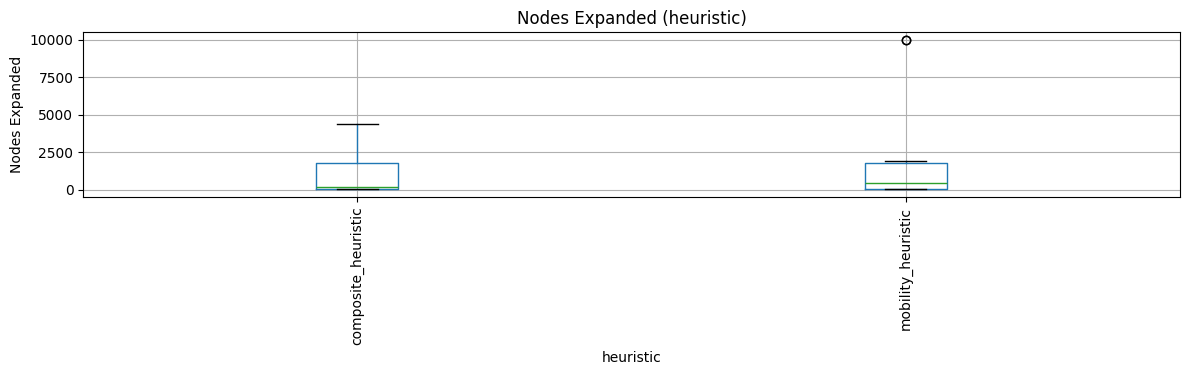

In [ ]:
# Choose what to show:
include_algorithms = ["astar"]          # example
include_heuristics = [# "null_heuristic", 
                      # "mate_in_one_heuristic", 
                    #   "material_heuristic",
                      # "attacker_proximity_heuristic",
                    #   "opponent_king_escape_heuristic",
                      "mobility_heuristic",
                      # "checks_available_heuristic",
                      "composite_heuristic"]          # example
plot_nodes_expanded(algorithms=include_algorithms, heuristics=include_heuristics)